# Analyzing Green Destinations Data

<br/>

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
import calendar
from scipy.stats import ttest_ind, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

<br/>

### Load the Dataset

In [2]:
# Read the data
greenDest_data = pd.read_csv('greendestination.csv')

In [3]:
# Display the first ten rows
greenDest_data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


<br/>

### Studying and Transforming the Data

In [4]:
# Basic information about the dataset
greenDest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Analysis:**

1. There are 1470 rows in the given dataset along with 34 columns
2. There are no null values in the given dataset

In [5]:
# Confirming that there are no null values in the given dataset
greenDest_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**There are no null values in the given dataset**

In [6]:
# Descriptive Statastics
greenDest_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The descriptive statistics table provides a summary of various employee-related metrics for a sample size of 1470 observations. Here's a brief overview:

- **Age**: The average age is about 36.92 years, with a standard deviation of 9.14 years. Ages range from 18 to 60 years.
- **DailyRate**: The average daily rate is 802.49 with a high variability (standard deviation of 403.51), ranging from 102 to 1499.
- **DistanceFromHome**: On average, employees live 9.19 units away from work, with a standard deviation of 8.11, ranging from 1 to 29 units.
- **Education**: The average education level is 2.91 (on a scale possibly from 1 to 5), with most employees having levels between 2 and 4.
- **EmployeeCount**: Constant at 1, indicating each row corresponds to one employee.
- **EmployeeNumber**: Employee numbers range widely from 1 to 2068, with a mean around 1024.87.
- **EnvironmentSatisfaction**: The average satisfaction is 2.72 (on a scale of 1 to 4), with moderate variation.
- **HourlyRate**: The mean hourly rate is 65.89 with a range from 30 to 100 and a standard deviation of 20.33.
- **JobInvolvement**: Average involvement is 2.73, suggesting moderate engagement.
- **JobLevel**: The average job level is 2.06, with levels ranging from 1 to 5.

Other important metrics include:

- **RelationshipSatisfaction**: Average is 2.71 on a scale likely from 1 to 4.
- **StandardHours**: Fixed at 80 hours, indicating a standard work measure.
- **StockOptionLevel**: Average is 0.79, with options ranging from 0 to 3.
- **TotalWorkingYears**: On average, employees have 11.28 years of working experience, with a range from 0 to 40 years.
- **TrainingTimesLastYear**: Employees underwent training around 2.80 times on average last year.
- **WorkLifeBalance**: Average balance is 2.76 (on a scale from 1 to 4).
- **YearsAtCompany**: Average tenure is 7 years, ranging from 0 to 40 years.
- **YearsInCurrentRole**: Employees have spent an average of 4.23 years in their current role.
- **YearsSinceLastPromotion**: The average time since the last promotion is 2.19 years.
- **YearsWithCurrManager**: Employees have worked with their current manager for an average of 4.12 years.

These statistics provide a snapshot of the workforce's demographics, job-related factors, and satisfaction levels.

<br/>

### Attrition Rate

In [7]:
# Percentage of Attrition in the company

attrition = greenDest_data['Attrition'].value_counts().get('Yes', 0)
attrition_percent = (attrition/greenDest_data.shape[0]) * 100
round(attrition_percent, 4)

16.1224

**The attrition rate in Green Destination is 16.1224**

<br/>

## Analyze Factors influencing Attrition

(As requested by Green Destionation HR Director)

### Age

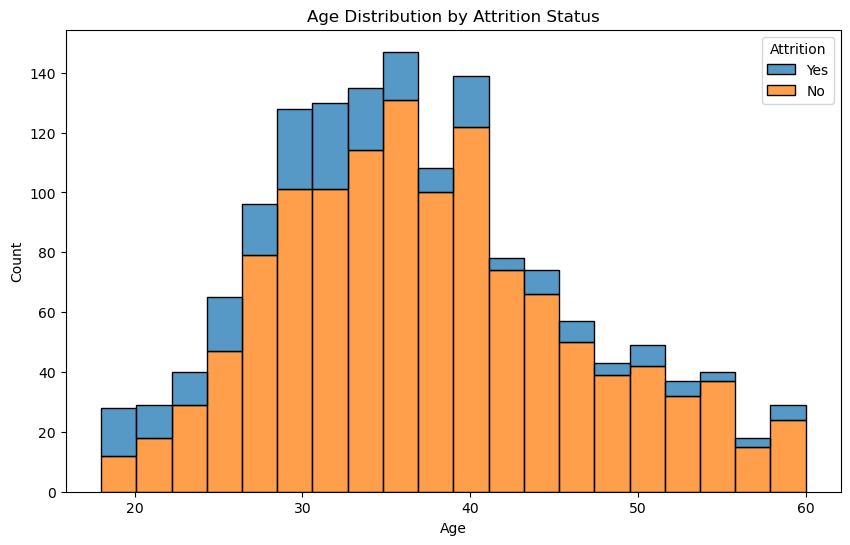

In [8]:
plt.figure(figsize=(10, 6))
sn.histplot(data=greenDest_data, x='Age', hue='Attrition', multiple='stack', bins=20)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Analysis:**

The age distribution shows that attrition occurs across various age groups, with a noticeable frequency in the younger and middle-aged employees (<=40 years approximately).

<br/>

### Years at the Company

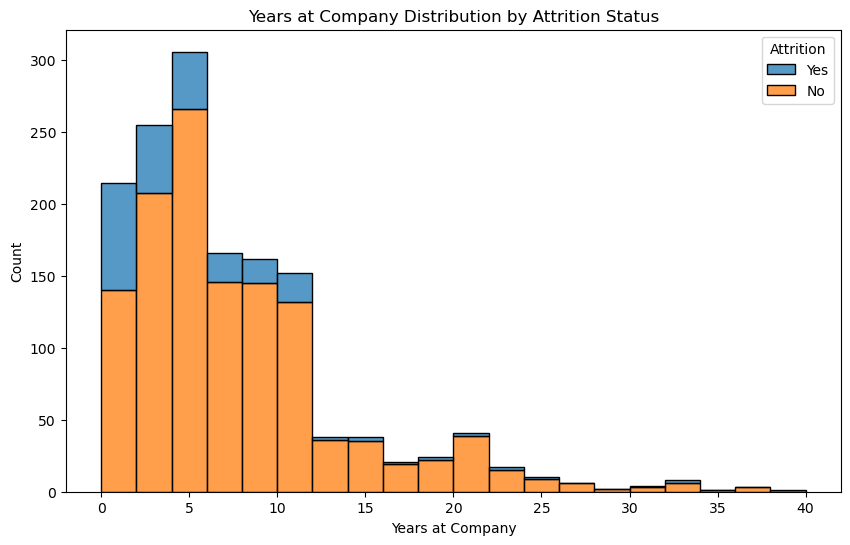

In [9]:
plt.figure(figsize=(10, 6))
sn.histplot(data=greenDest_data, x='YearsAtCompany', hue='Attrition', multiple='stack', bins=20)
plt.title('Years at Company Distribution by Attrition Status')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.show()

**Analysis:**

Employees with fewer years at the company tend to have higher attrition rates. There is a significant drop in attrition as the number of years at the company increases.

<br/>

### Income

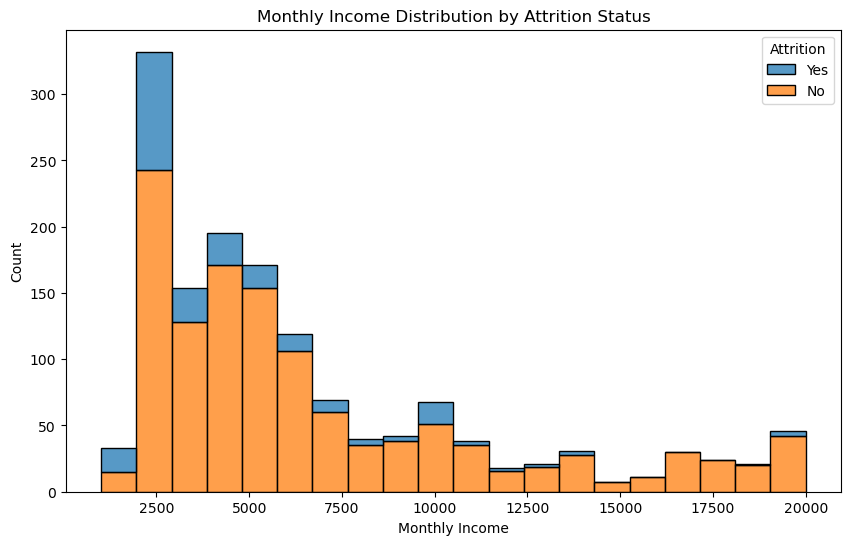

In [10]:
plt.figure(figsize=(10, 6))
sn.histplot(data=greenDest_data, x='MonthlyIncome', hue='Attrition', multiple='stack', bins=20)
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

**Analysis:**

Employees with montly income less or around 2500 are more likely to leave the company.

<br/>

**Find factors which are highly correlated with Attrition**

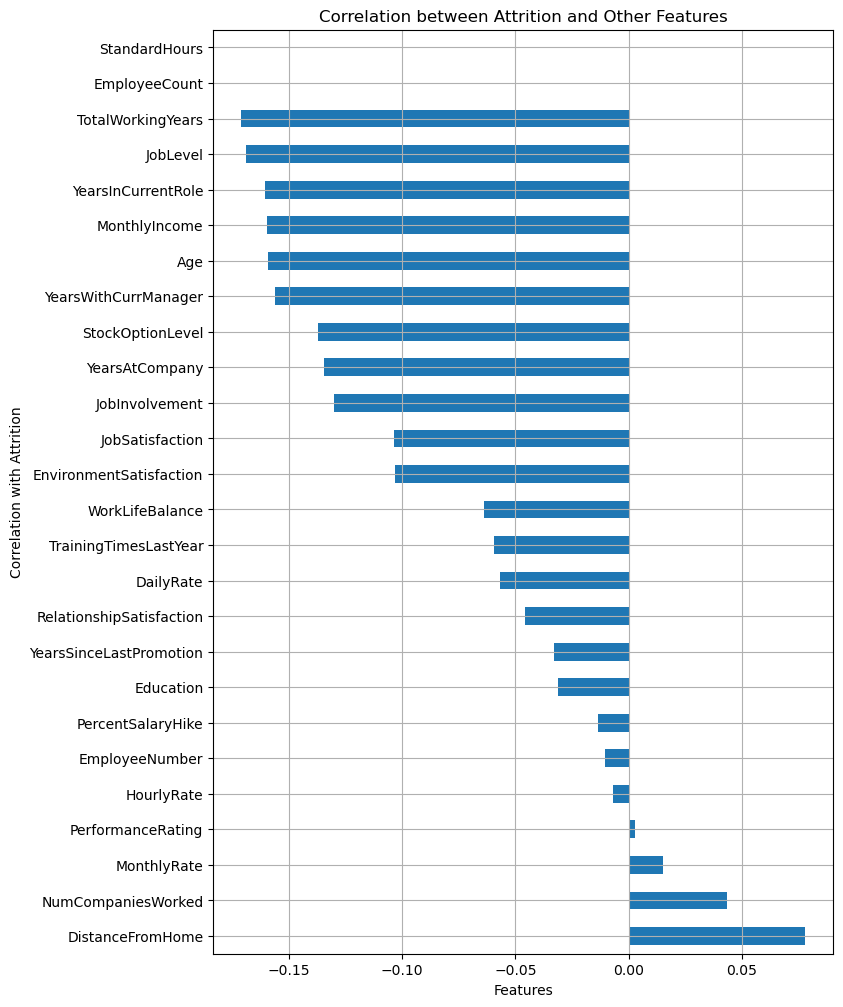

In [11]:
greenDest_data['Attrition'] = greenDest_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

correlation_matrix = greenDest_data.corr()
attrition_correlation = correlation_matrix['Attrition'].drop('Attrition')

plt.figure(figsize=(8, 12))
attrition_correlation.sort_values(ascending=False).plot(kind='barh')
plt.title('Correlation between Attrition and Other Features')
plt.xlabel('Features')
plt.ylabel('Correlation with Attrition')
plt.grid()
plt.show()

**Analysis:**

The plot displays the correlation between the Attrition variable and various other features in the dataset. Here is an analysis of the key observations from the plot:

1. Negative Correlations:
* Total Working Years: This feature has the strongest negative correlation with attrition. Employees with more years of experience tend to stay longer at the company.
* Job Level: Higher job levels are associated with lower attrition rates.
* Years in Current Role: Employees who have spent more time in their current role are less likely to leave.
* Monthly Income: Higher monthly income is correlated with lower attrition.
* Age: Older employees are less likely to leave the company.
* Years with Current Manager: Employees who have worked longer with their current manager show lower attrition rates.
* Years at Company: Employees who have been at the company for longer periods tend to have lower attrition rates.

<br/>

2. Positive Correlations:
* Distance from Home: This feature shows the strongest positive correlation with attrition, indicating that employees who live farther from work are more likely to leave.
* Number of Companies Worked: Employees who have worked for more companies in the past are more likely to leave.

<br/>

3. Near Zero or Minimal Correlations:
* Performance Rating, Hourly Rate, Employee Number, Percent Salary Hike, Education: These features show minimal to no correlation with attrition.
* Monthly Rate and Relationship Satisfaction also show very low correlations.

<br/>

Lets also analyze other important factors

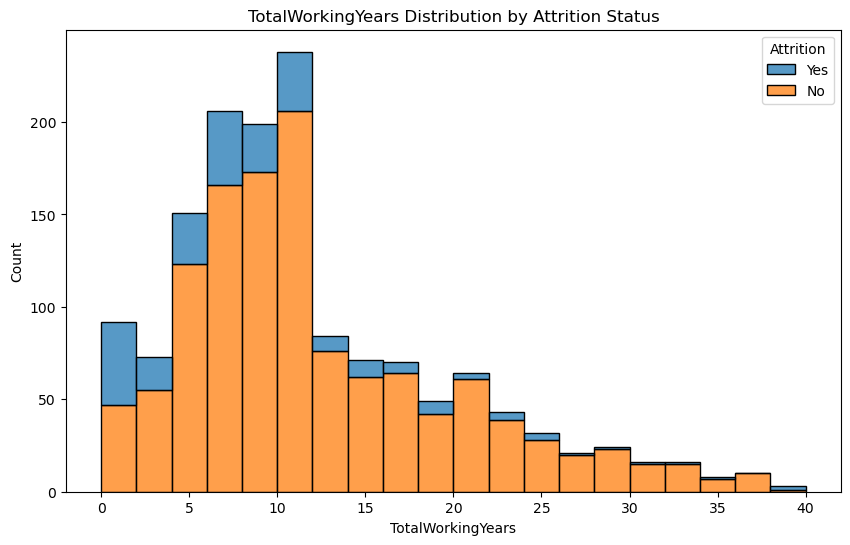

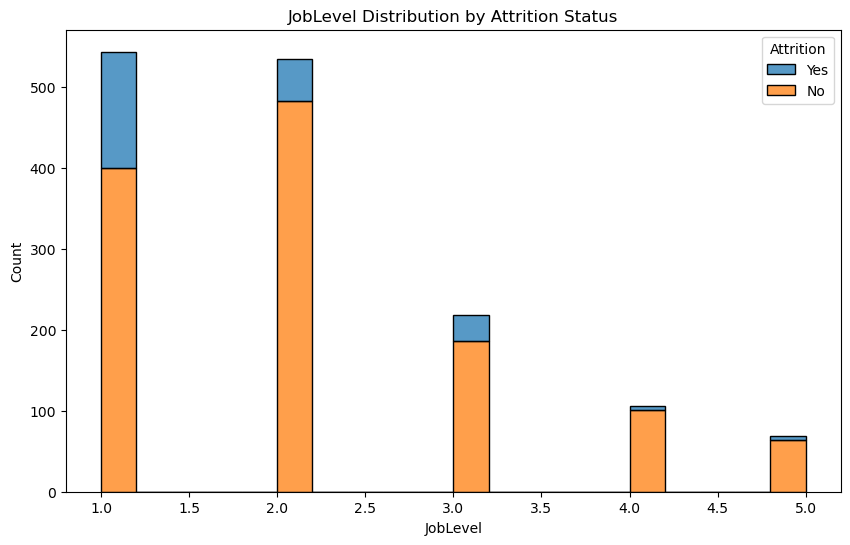

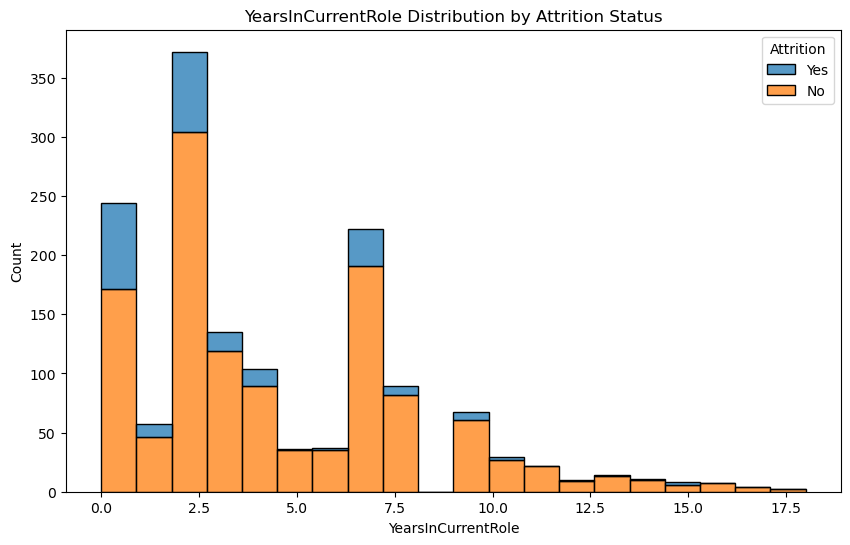

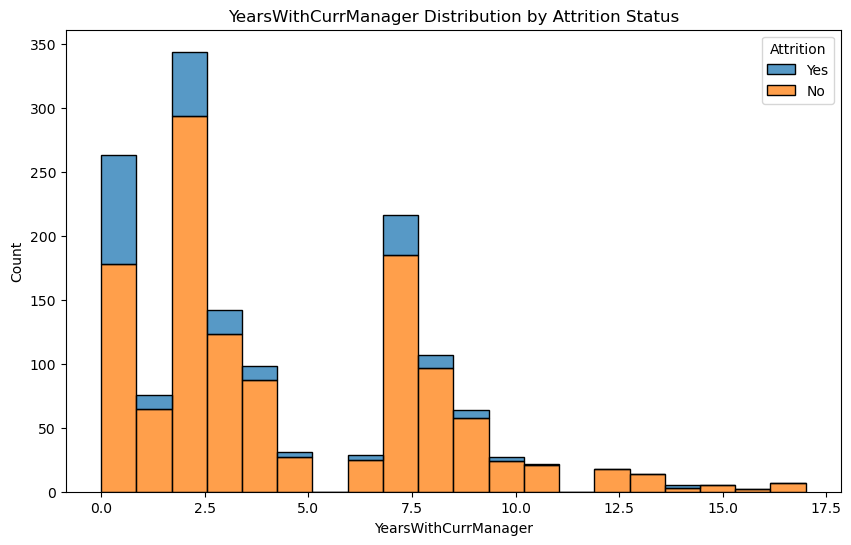

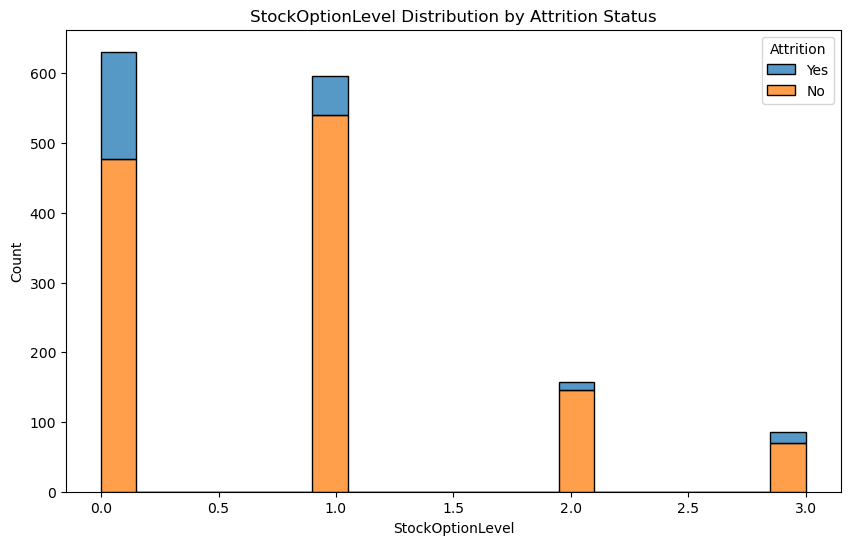

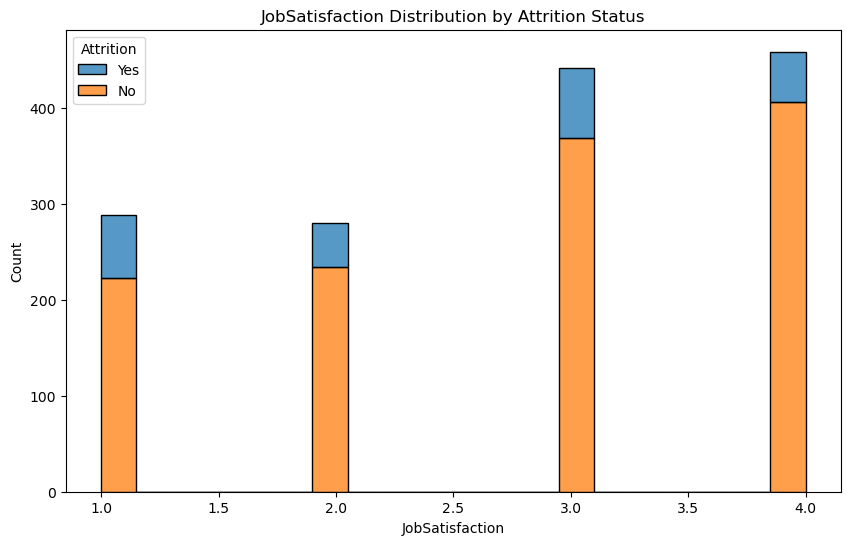

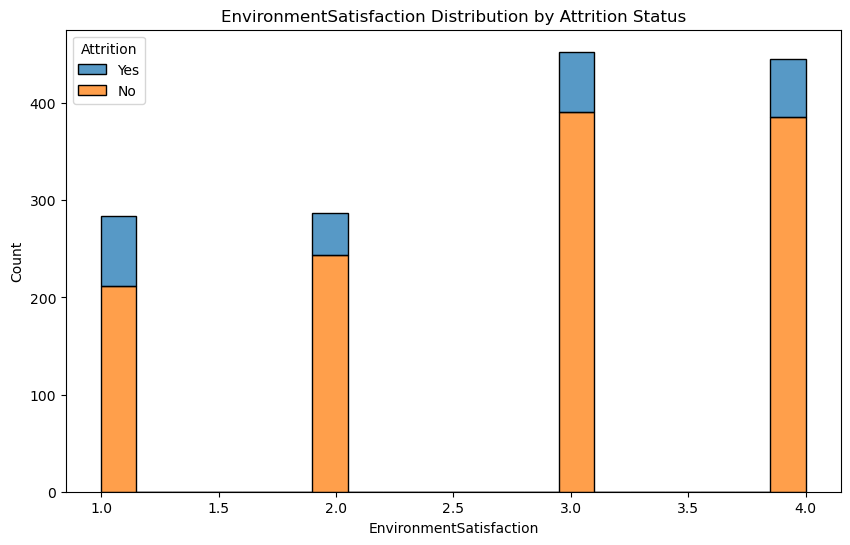

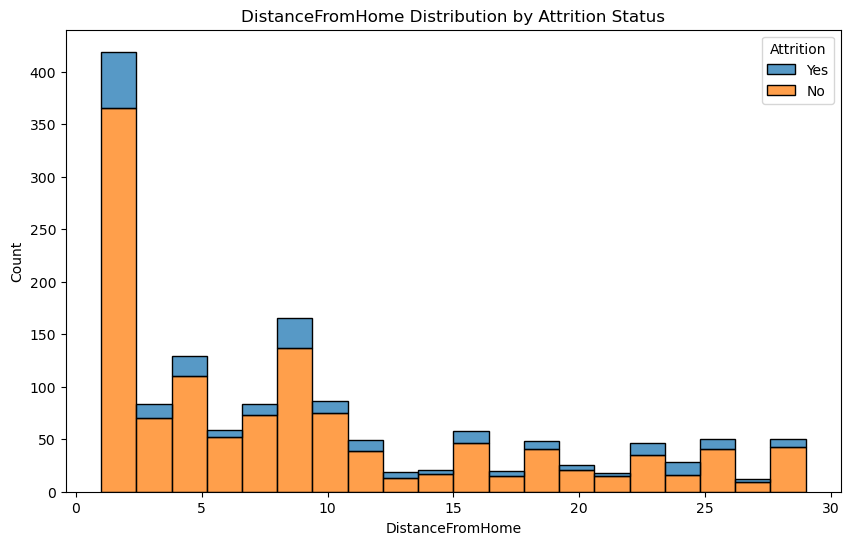

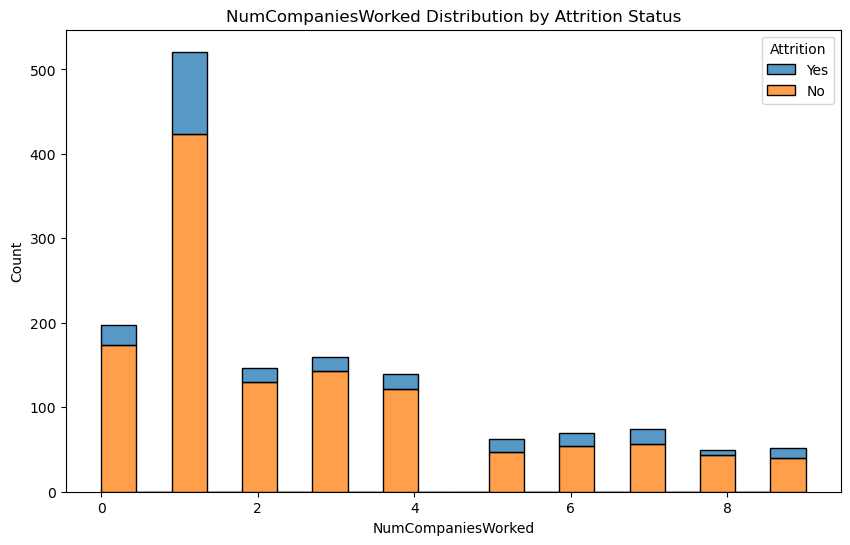

In [12]:
greenDest_data['Attrition'] = greenDest_data['Attrition'].apply(lambda x: 'Yes' if x == 1 else 'No')

features_to_plot = [
    'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'YearsWithCurrManager',
    'StockOptionLevel', 'JobSatisfaction', 'EnvironmentSatisfaction', 'DistanceFromHome',
    'NumCompaniesWorked'
]

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sn.histplot(data=greenDest_data, x=feature, hue='Attrition', multiple='stack', bins=20)
    plt.title(f'{feature} Distribution by Attrition Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

**Analysis:**

1. Total Working Years: Employees with fewer years of experience are more likely to leave.
2. Job Level: Similarly employees having lower designation are more likely to leave.
3. Similarly if employees tend to stay with the same manager for longer periods tend to stay.
4. Wheras, there is no specific pattern for attrition when considering job and environment satisfaction.
5. Majority of employees reside near to work but the attrition pattern is not clear.



## Factors of most importance in influencing Attrition

1. Age
2. Monthly Income
3. Years at the company
4. Total Working Years
5. Job Level
6. Years in Current Role
7. Years with Current Manager
8. Distance from Home
9. Number of Companies worked


Lets test using T statastics to confirm the influence of these factors

In [24]:
features_to_test = [
    'Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 
    'JobLevel', 'YearsInCurrentRole', 'YearsWithCurrManager',
    'StockOptionLevel', 'JobSatisfaction', 'EnvironmentSatisfaction', 
    'DistanceFromHome'
]

for i in features_to_test:
    attrition_yes = greenDest_data[greenDest_data['Attrition'] == 'Yes'][i]
    attrition_no = greenDest_data[greenDest_data['Attrition'] == 'No'][i]
    t_stat, p_val = ttest_ind(attrition_yes, attrition_no, nan_policy='omit')
    print(f'T-test for {i}: t-statistic={t_stat}, p-value={p_val}\n\n')


T-test for Age: t-statistic=-6.178663835307217, p-value=8.356308021103587e-10


T-test for MonthlyIncome: t-statistic=-6.203935765608938, p-value=7.14736398535381e-10


T-test for YearsAtCompany: t-statistic=-5.1963086670254235, p-value=2.3188716103863033e-07


T-test for TotalWorkingYears: t-statistic=-6.6522546135024445, p-value=4.0618781112668525e-11


T-test for JobLevel: t-statistic=-6.573837830953691, p-value=6.795384780015255e-11


T-test for YearsInCurrentRole: t-statistic=-6.232038413295282, p-value=6.003185843641377e-10


T-test for YearsWithCurrManager: t-statistic=-6.059068531868998, p-value=1.7369867845242207e-09


T-test for StockOptionLevel: t-statistic=-5.3047620976099115, p-value=1.3010149660019924e-07


T-test for JobSatisfaction: t-statistic=-3.9862267630568273, p-value=7.04306674173115e-05


T-test for EnvironmentSatisfaction: t-statistic=-3.9818600026818496, p-value=7.17233854936886e-05


T-test for DistanceFromHome: t-statistic=2.994708098265125, p-value=0.0027930

**Analysis:**

Most Significant Features:

1. Total Working Years: Highly significant based on t-test.
2. Job Level: Highly significant based on t-test.
3. Monthly Income: Highly significant based on t-test.
4. Years in Current Role: Highly significant based on t-test.
5. Age: Highly significant based on t-test.
6. Years with Current Manager: Highly significant based on t-test.
7. Years at Company: Highly significant based on t-test.
8. Stock Option Level: Highly significant based on t-test.
9. Job Satisfaction: Significant based on both t-test.
10. Environment Satisfaction: Significant based on t-test.

## Detailed Analysis

1. **Total Working Years**: Highly significant in explaining attrition. Employees with more working years are less likely to leave, indicating experience plays a crucial role in retention.

2. **Job Level**: Higher job levels are associated with lower attrition rates. Employees in higher-level positions likely have better job security and satisfaction.

3. **Monthly Income**: Significant factor. Higher income is associated with lower attrition, suggesting that competitive compensation helps retain employees.

4. **Years in Current Role**: Longer tenure in the current role is associated with lower attrition, indicating stability and satisfaction in one's role reduce the likelihood of leaving.

5. **Age**: Older employees are less likely to leave, suggesting that more experienced and older employees find more stability in their jobs.

6. **Years with Current Manager**: Longer relationships with managers are associated with lower attrition, highlighting the importance of managerial relationships in employee retention.

7. **Years at Company**: Longer tenure at the company correlates with lower attrition, indicating loyalty and satisfaction with the company culture.

8. **Stock Option Level**: Higher stock option levels are linked to lower attrition, suggesting that stock options are an effective retention tool.

9. **Job Satisfaction**: Significant factor. Higher job satisfaction reduces attrition, emphasizing the importance of creating a satisfying work environment.

10. **Environment Satisfaction**: Significant factor. A positive work environment contributes to lower attrition.



**The above are main areas to be focussed in reducing attrition**

## Conclusion

To reduce attrition, Green Destinations should focus on:

* Enhancing job satisfaction and creating a positive work environment.
* Offering competitive compensation and stock options.
* Providing career advancement opportunities to increase job levels.
* Fostering strong relationships between employees and their managers.
* Retaining experienced employees by acknowledging their value and contributions.

By addressing these significant factors, Green Destinations can effectively reduce employee turnover and improve overall retention.
